<a href="https://colab.research.google.com/github/elaefry/TubesTKC/blob/main/neural_network/ISIC_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
import os
import zipfile

local_zip = '/content/gdrive/My Drive/TKC/archive (1).zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import os
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from os import getcwd
import zipfile
import shutil
import numpy as np
import glob
import random
import pandas as pd
import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import pathlib
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy

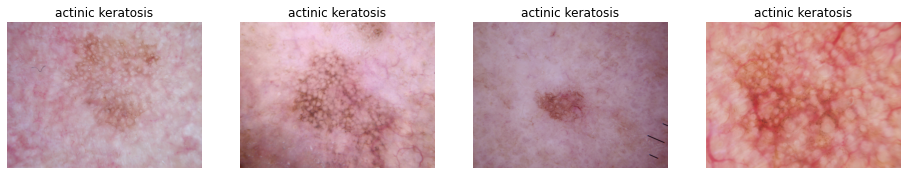

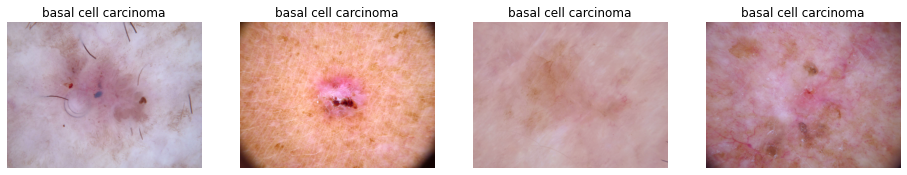

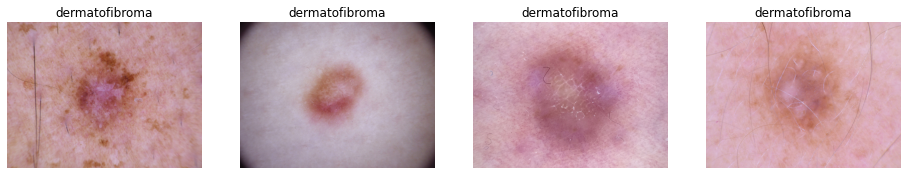

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:104: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


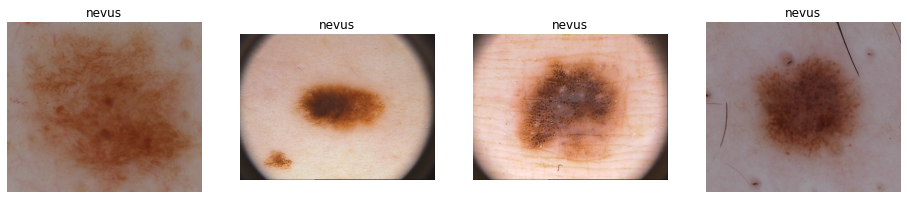

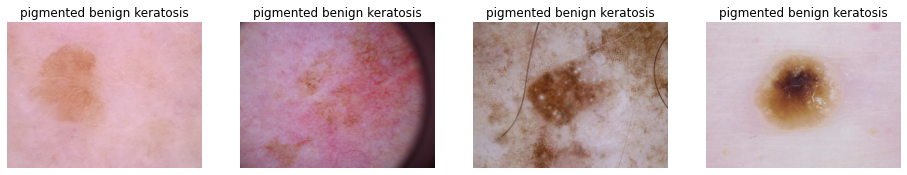

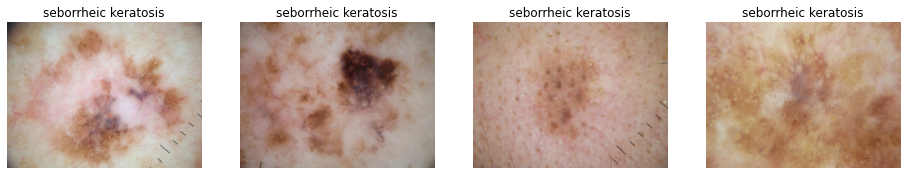

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:152: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


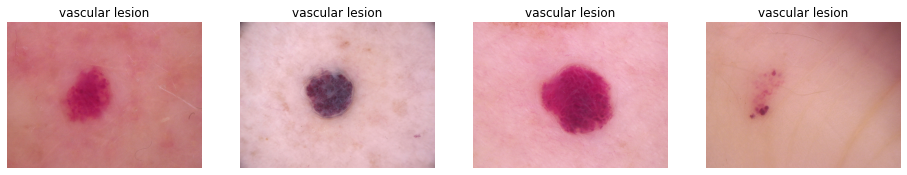

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

Act_dir=os.path.join('/content/ISIC/Train/actinic keratosis')
Bas_dir=os.path.join('/content/ISIC/Train/basal cell carcinoma')
Der_dir=os.path.join('/content/ISIC/Train/dermatofibroma')
Mel_dir=os.path.join('/content/ISIC/Train/melanoma')
Nev_dir=os.path.join('/content/ISIC/Train/nevus')
Pig_dir=os.path.join('/content/ISIC/Train/pigmented benign keratosis')
Seb_dir=os.path.join('/content/ISIC/Train/seborrheic keratosis')
Squ_dir=os.path.join('/content/ISIC/Train/squamous cell carcinoma')
Vas_dir=os.path.join('/content/ISIC/Train/vascular lesion')

Act_image = os.listdir(Act_dir)
Bas_image = os.listdir(Bas_dir)
Der_image = os.listdir(Der_dir)
Mel_image = os.listdir(Mel_dir)
Nev_image = os.listdir(Nev_dir)
Pig_image = os.listdir(Pig_dir)
Seb_image = os.listdir(Seb_dir)
Squ_image = os.listdir(Squ_dir)
Vas_image = os.listdir(Vas_dir)

fname1 = [os.path.join(Act_dir,fname1)
        for fname1 in Act_image[:4]]

fname2 = [os.path.join(Bas_dir,fname2)
        for fname2 in Bas_image[:4]]

fname3 = [os.path.join(Der_dir,fname3)
        for fname3 in Der_image[:4]]

fname4 = [os.path.join(Mel_dir,fname4)
        for fname4 in Mel_image[:4]]

fname5 = [os.path.join(Nev_dir,fname5)
        for fname5 in Nev_image[:4]]

fname6 = [os.path.join(Pig_dir,fname6)
        for fname6 in Pig_image[:4]]

fname7 = [os.path.join(Seb_dir,fname7)
        for fname7 in Seb_image[:4]]

fname8 = [os.path.join(Squ_dir,fname8)
        for fname8 in Squ_image[:4]]

fname9 = [os.path.join(Vas_dir,fname9)
        for fname9 in Vas_image[:4]]

ncolu = 4
nrow = 9
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('actinic keratosis')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 9
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('basal cell carcinoma')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 9
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname3):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('dermatofibroma')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 9
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname4):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('melanoma')
    plt.imshow(img)
  
ncolu = 4
nrow = 9
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname5):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('nevus')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 9
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname6):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('pigmented benign keratosis')
    plt.imshow(img)
    
plt.show()

ncolu = 4
nrow = 9
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname7):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('seborrheic keratosis')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 9
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname8):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('sqhuamous cell carcinoma')
    plt.imshow(img)

ncolu = 4
nrow = 9
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname9):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('vascular lesion')
    plt.imshow(img)

In [15]:
!pip install Augmentor

In [ ]:
import Augmentor
path_to_training_dataset = '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
class_names=['actinic keratosis','basal cell carcinoma','dermatofibroma','melanoma','nevus','pigmented benign keratosis','seborrheic keratosis','squamous cell carcinoma','vascular lesion']
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i, output_directory='/kaggle/working/upsampled/'+i+'/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1000) 

Initialised with 114 image(s) found.
Output directory set to /kaggle/working/upsampled/actinic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F24D3FE4FD0>: 100%|██████████| 1000/1000 [00:37<00:00, 26.59 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /kaggle/working/upsampled/basal cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F24CED8F510>: 100%|██████████| 1000/1000 [00:37<00:00, 26.45 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /kaggle/working/upsampled/dermatofibroma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F24D40510D0>: 100%|██████████| 1000/1000 [00:38<00:00, 25.89 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /kaggle/working/upsampled/melanoma/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F24CEEF8510>: 100%|██████████| 1000/1000 [03:20<00:00,  4.99 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /kaggle/working/upsampled/nevus/output/.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F24CEE2F650>: 100%|██████████| 1000/1000 [02:52<00:00,  5.78 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /kaggle/working/upsampled/pigmented benign keratosis/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F24CED6D510>: 100%|██████████| 1000/1000 [00:38<00:00, 25.66 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /kaggle/working/upsampled/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F24CEE534D0>: 100%|██████████| 1000/1000 [01:36<00:00, 10.39 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /kaggle/working/upsampled/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F24DC7B2050>: 100%|██████████| 1000/1000 [00:40<00:00, 24.98 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /kaggle/working/upsampled/vascular lesion/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F24CEF00510>:   2%|▏         | 19/1000 [00:01<00:44, 21.89 Samples/s]

In [ ]:
output_dir = pathlib.Path('/kaggle/working/upsampled')

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  
  image_size=(256,256),
  )

Found 9000 files belonging to 9 classes.
Using 7200 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  
  image_size=(256,256),
  )

Found 9000 files belonging to 9 classes.
Using 1800 files for validation.


In [ ]:
model = keras.Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)))
model.add(layers.Conv2D(16, 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.05))

model.add(layers.Conv2D(32, 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.05))

model.add(layers.Conv2D(64, 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(layers.Conv2D(128, 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.05))

model.add(layers.Conv2D(256, 3, padding='same',))
model.add(Activation('relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.05))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(9))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(train_ds,
                               epochs=30,
                               validation_data=val_ds)

Epoch 1/30
225/225 [==============================] - 83s 124ms/step - loss: 1.8156 - acc: 0.2682 - val_loss: 1.6430 - val_acc: 0.3267
Epoch 2/30
225/225 [==============================] - 21s 94ms/step - loss: 1.4553 - acc: 0.4264 - val_loss: 1.3613 - val_acc: 0.4694
Epoch 3/30
225/225 [==============================] - 21s 93ms/step - loss: 1.2885 - acc: 0.5061 - val_loss: 1.2060 - val_acc: 0.5444
Epoch 4/30
225/225 [==============================] - 21s 93ms/step - loss: 1.1169 - acc: 0.5836 - val_loss: 1.0407 - val_acc: 0.5989
Epoch 5/30
225/225 [==============================] - 21s 93ms/step - loss: 0.9110 - acc: 0.6594 - val_loss: 0.8699 - val_acc: 0.6839
Epoch 6/30
225/225 [==============================] - 21s 93ms/step - loss: 0.6929 - acc: 0.7432 - val_loss: 0.6916 - val_acc: 0.7528
Epoch 7/30
225/225 [==============================] - 21s 93ms/step - loss: 0.5580 - acc: 0.8021 - val_loss: 0.6385 - val_acc: 0.7722
Epoch 8/30
225/225 [==============================] - 21s 93m

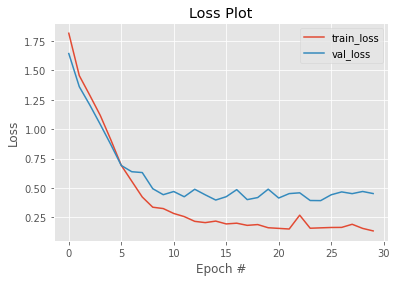

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), history.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

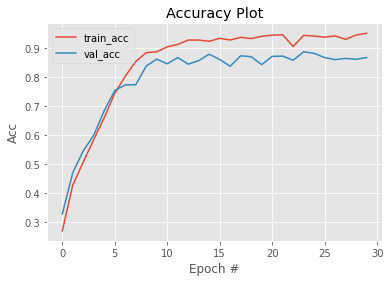

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, 30), history.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(val_ds)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

57/57 [==============================] - 2s 30ms/step - loss: 0.4530 - acc: 0.8667
Test accuracy: 0.8666666746139526
Test loss: 0.4529648423194885
